In [36]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

In [37]:
df.dtypes

Date          object
Production     int64
dtype: object

In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [39]:
df = df.set_index('Date')

In [40]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

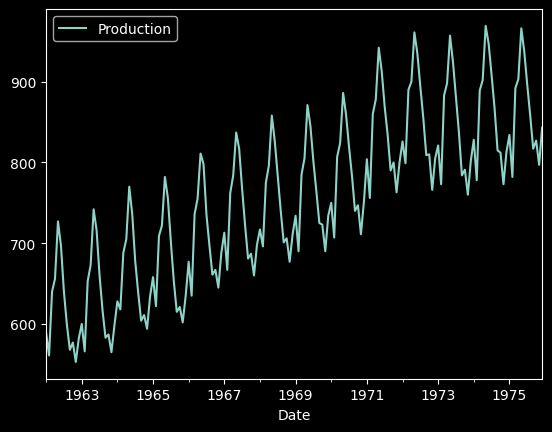

In [41]:
df.plot()

In [42]:
df['Month'] = df.index.month

In [43]:
df['Month'] = df.index.strftime('%B')

<Axes: title={'center': 'Production'}, xlabel='[Month]'>

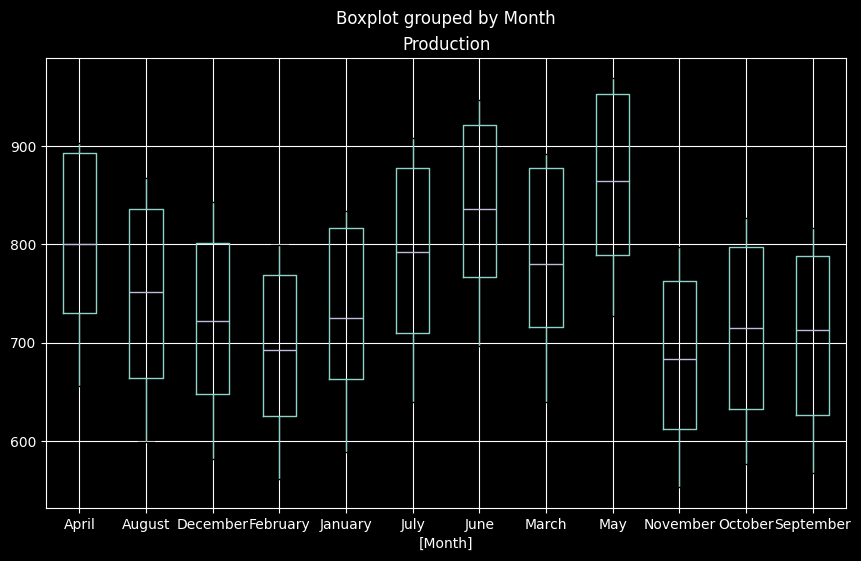

In [44]:
df[['Production', 'Month']].boxplot(by='Month', grid=True, figsize=(10,6))

In [46]:
starbucks = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/starbucks.csv', index_col='Date', parse_dates=True)

In [47]:
starbucks.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<Axes: xlabel='Date'>

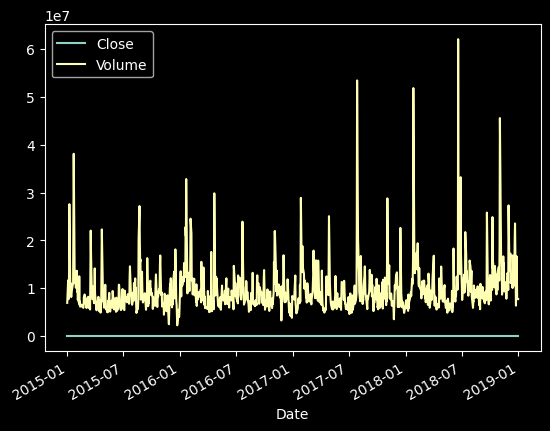

In [48]:
starbucks.plot()

This isn't very helpful due to the difference in y-values, so I am split them up.

[Text(0.5, 0, 'Closing Date'), Text(0, 0.5, 'Closing Price (USD)')]

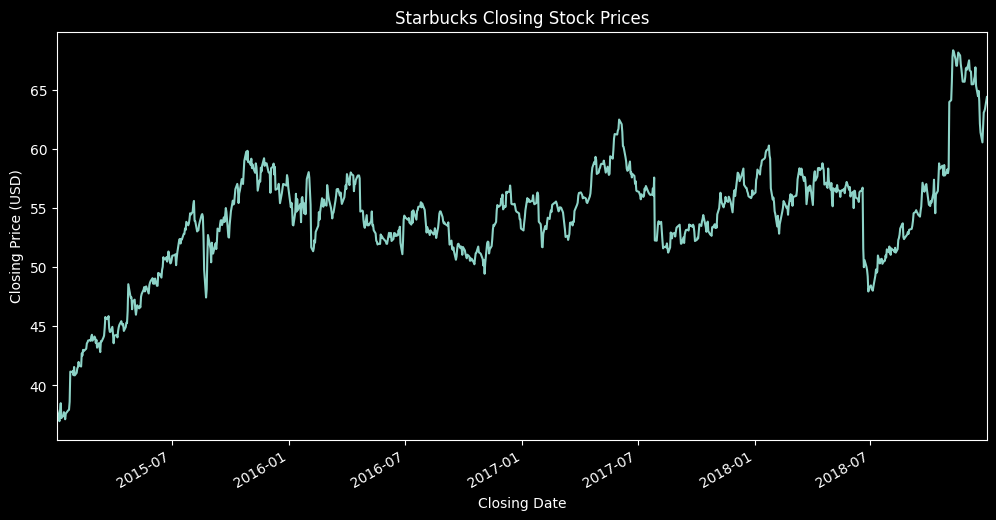

In [49]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = starbucks['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

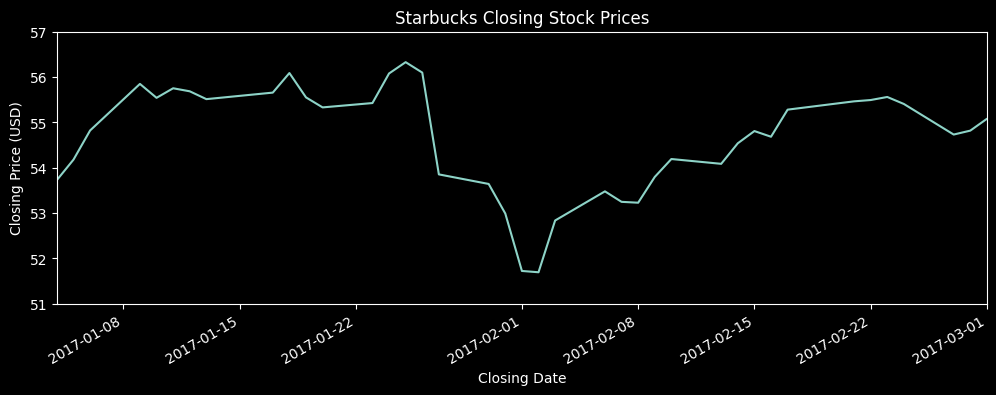

In [50]:
#dates separated by commas
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = starbucks['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

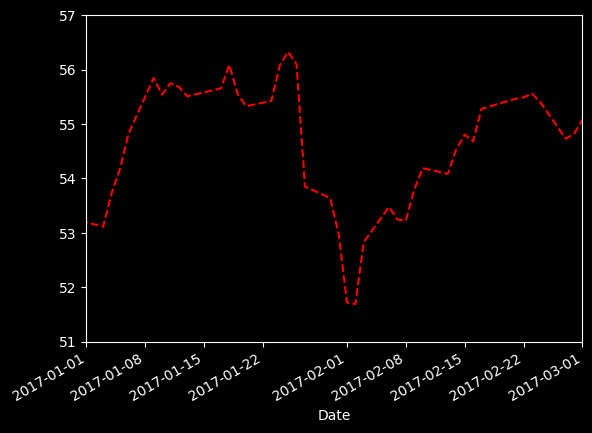

In [51]:
starbucks['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

In [52]:

from matplotlib import dates

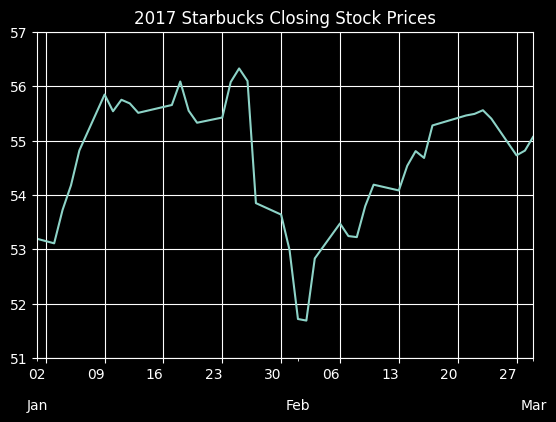

In [53]:

ax = starbucks['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [55]:
df2 = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/UMTMVS.csv', parse_dates=True)

In [56]:
df2 = df2.set_index('DATE')

In [57]:
df2.index = pd.to_datetime(df2.index)

<Axes: xlabel='DATE'>

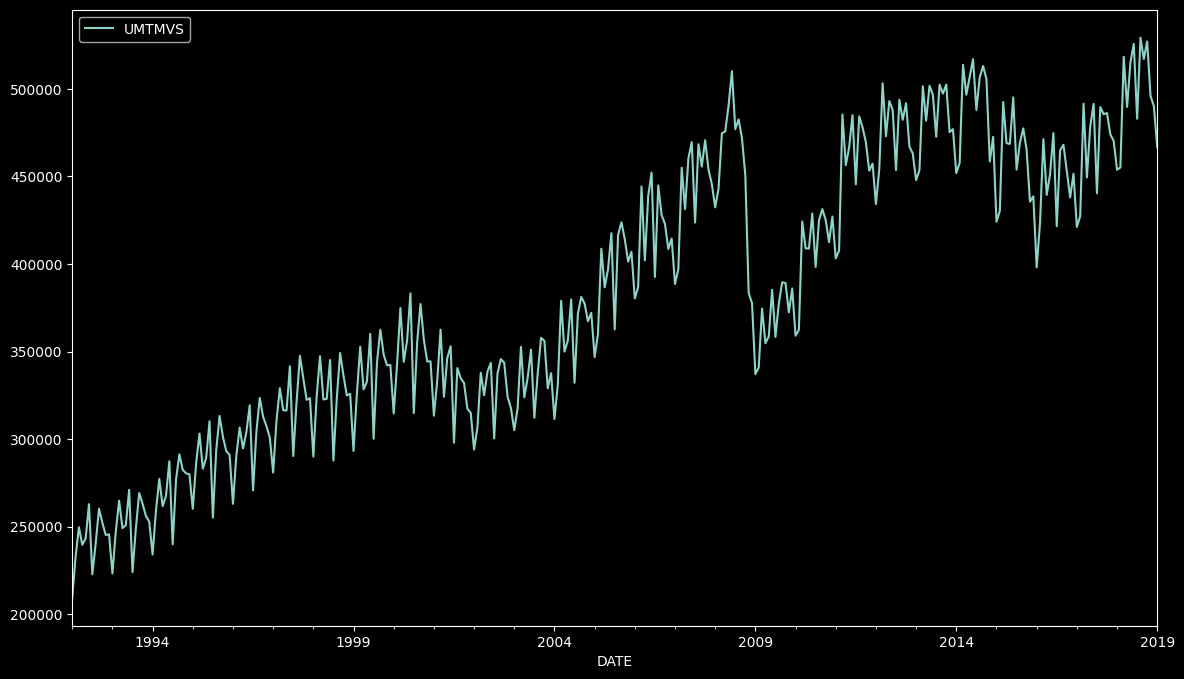

In [58]:
df2.plot(figsize=(14,8))

In [59]:
# to get the percent increase in value from Jan 2009 to Jan 2019
100 * (df2.loc['2019-01-01'] - df2.loc['2009-01-01']) / df2.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

In [60]:
# six months with highest values
df2.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


/tmp/ipykernel_640644/111873898.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df2.resample('Y').mean().plot.bar(figsize=(15,8))


<Axes: xlabel='DATE'>

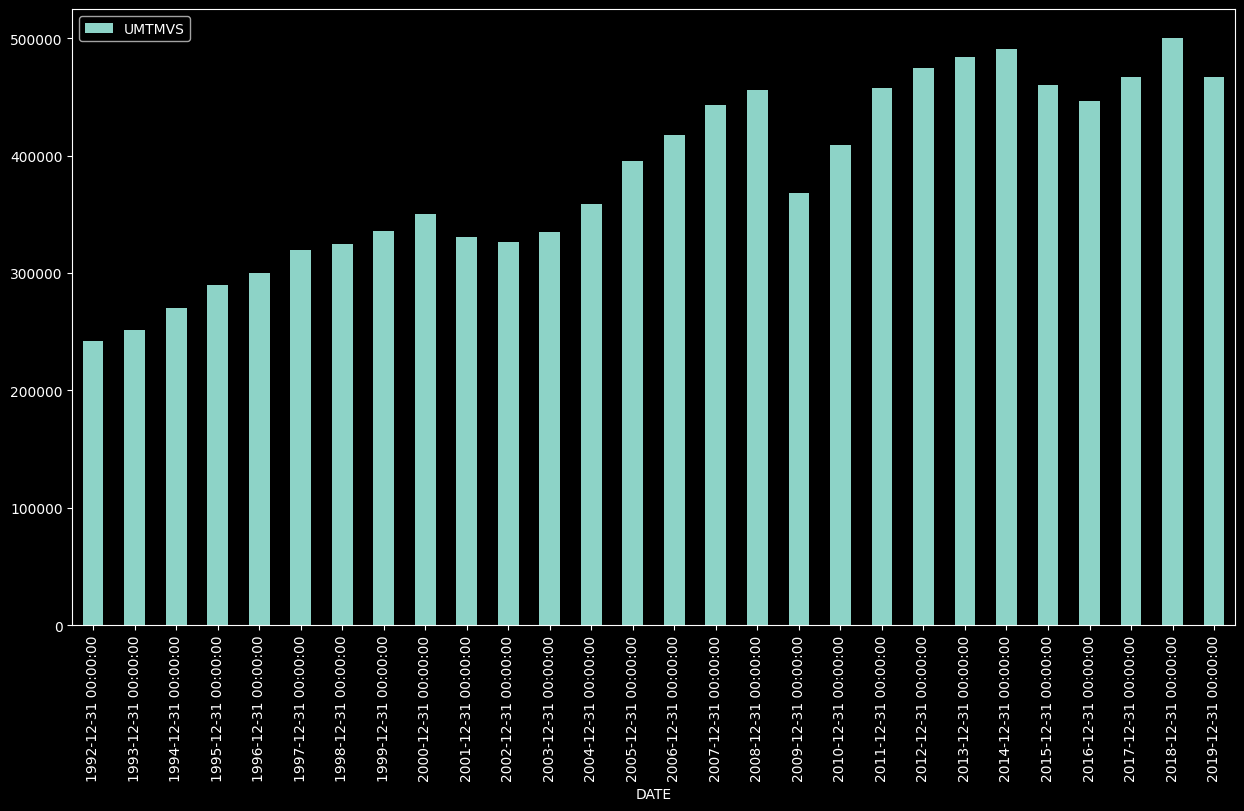

In [61]:
df2.resample('Y').mean().plot.bar(figsize=(15,8))

The year had the biggest increase in mean value from the previous year's mean value

In [62]:
yearly_data = df2.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

/tmp/ipykernel_640644/3045365374.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df2.resample('Y').mean()


In [63]:
change = yearly_data - yearly_data_shift

In [64]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00')

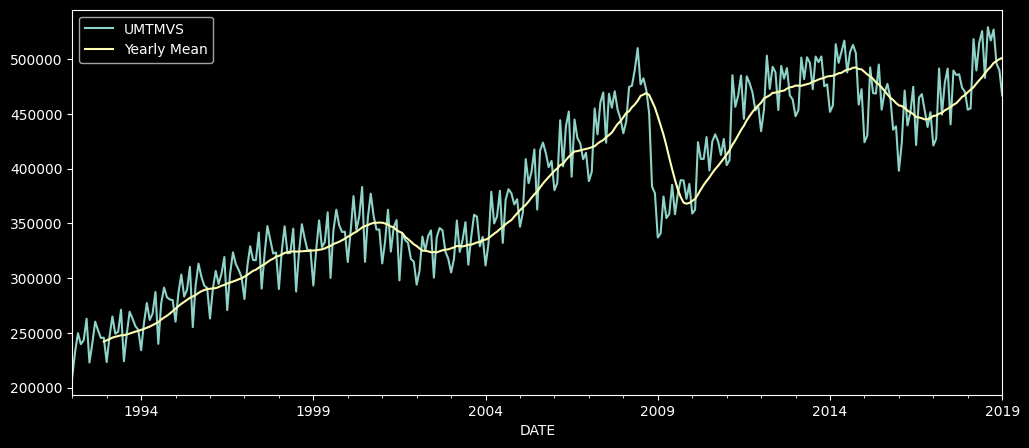

In [65]:
df2['Yearly Mean'] = df2['UMTMVS'].rolling(window=12).mean()
df2[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

general forecasting models

In [66]:
airline = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/airline_passengers.csv', index_col='Month', parse_dates=True)

In [67]:
airline.tail()
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [69]:
train = airline.iloc[:109]
test = airline.iloc[108:]

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [71]:
fit_model = ExponentialSmoothing(train['Thousands of Passengers'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12).fit()

/home/roserahimi/PycharmProjects/Sproj/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
test_pred = fit_model.forecast(36)

In [73]:
test_pred

1958-02-01    339.142880
1958-03-01    399.281629
1958-04-01    394.233596
1958-05-01    402.545258
1958-06-01    473.128674
1958-07-01    521.795179
1958-08-01    514.513417
1958-09-01    446.216641
1958-10-01    385.430818
1958-11-01    339.644998
1958-12-01    381.455587
1959-01-01    401.210069
1959-02-01    387.159094
1959-03-01    455.812351
1959-04-01    450.049612
1959-05-01    459.538048
1959-06-01    540.114741
1959-07-01    595.671502
1959-08-01    587.358780
1959-09-01    509.392473
1959-10-01    440.000528
1959-11-01    387.732302
1959-12-01    435.462479
1960-01-01    458.013822
1960-02-01    441.973495
1960-03-01    520.346754
1960-04-01    513.768120
1960-05-01    524.599939
1960-06-01    616.584766
1960-07-01    680.007313
1960-08-01    670.517667
1960-09-01    581.512807
1960-10-01    502.296275
1960-11-01    442.627858
1960-12-01    497.115724
1961-01-01    522.859911
Freq: MS, dtype: float64

Given that we have seasonality in data, the pred is not perfect but pretty good so far

<Axes: xlabel='Month'>

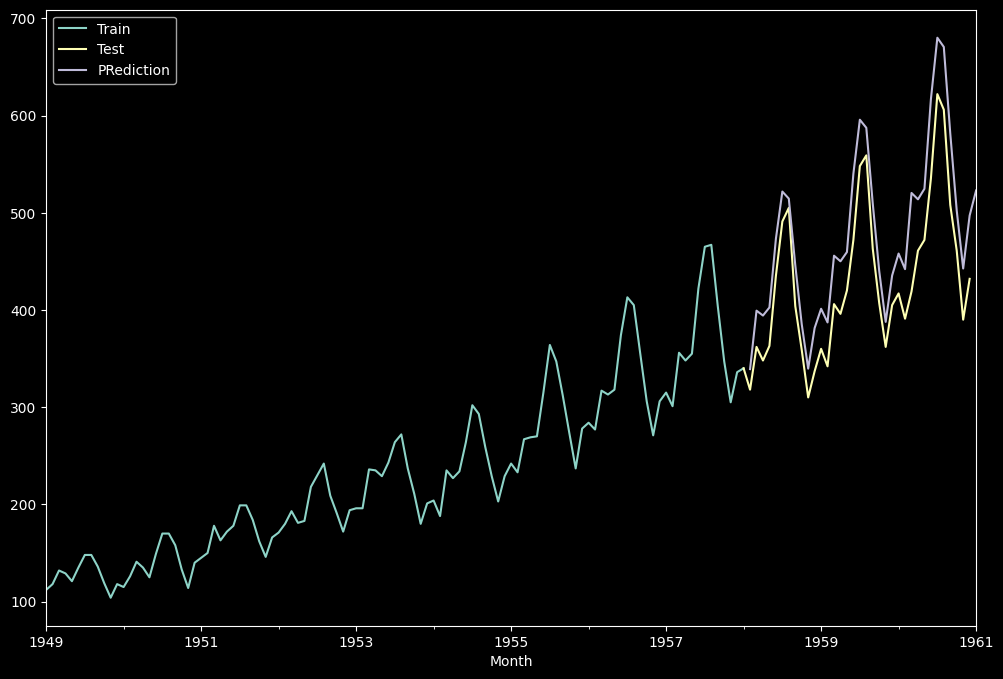

In [74]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))
test_pred.plot(legend= True, label= 'PRediction', figsize=(12,8))

<Axes: xlabel='Month'>

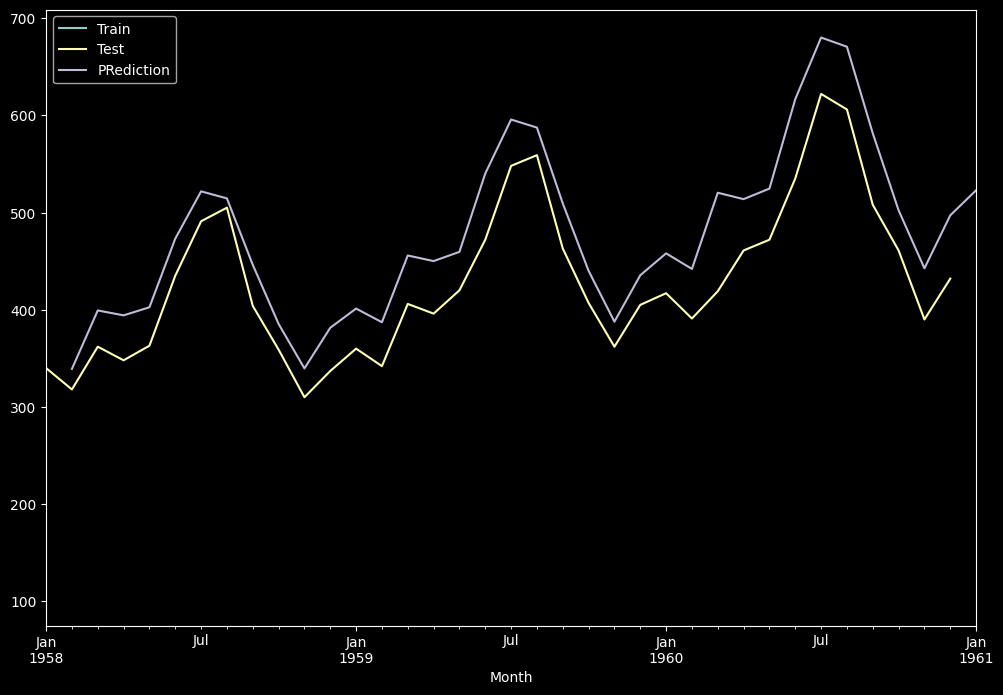

In [75]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(12,8))
test_pred.plot(legend= True, label= 'PRediction', figsize=(12,8), xlim =['1958-01-01', '1961-01-01'])

Let's do a evaluation of this with metrics designed for continuous values!
##### Mean Absolute Error (MAE) : won't alert us if we have a few error points
##### Mean Squared Error (MSE) : Larger are noted more than with MAE, can report the few errors that are off. Problem: the units are squared; makes it hard to interpret.
##### Root Mean Squared Error (RMSE) : The root will take care of the units back in the original form

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [85]:
mean_squared_error(test, test_pred)

5614.249320273678

In [84]:
import numpy as np
x = np.sqrt(mean_squared_error(test, test_pred))
print(x)

74.92829452398925


In [86]:
mean_absolute_error(test, test_pred)

63.03110967247013

In [87]:
final_model = ExponentialSmoothing(airline['Thousands of Passengers'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12).fit()

/home/roserahimi/PycharmProjects/Sproj/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
forecast_pred = final_model.forecast(36)

pretty good, we still hae the seasonality effect in our future forecast

<Axes: xlabel='Month'>

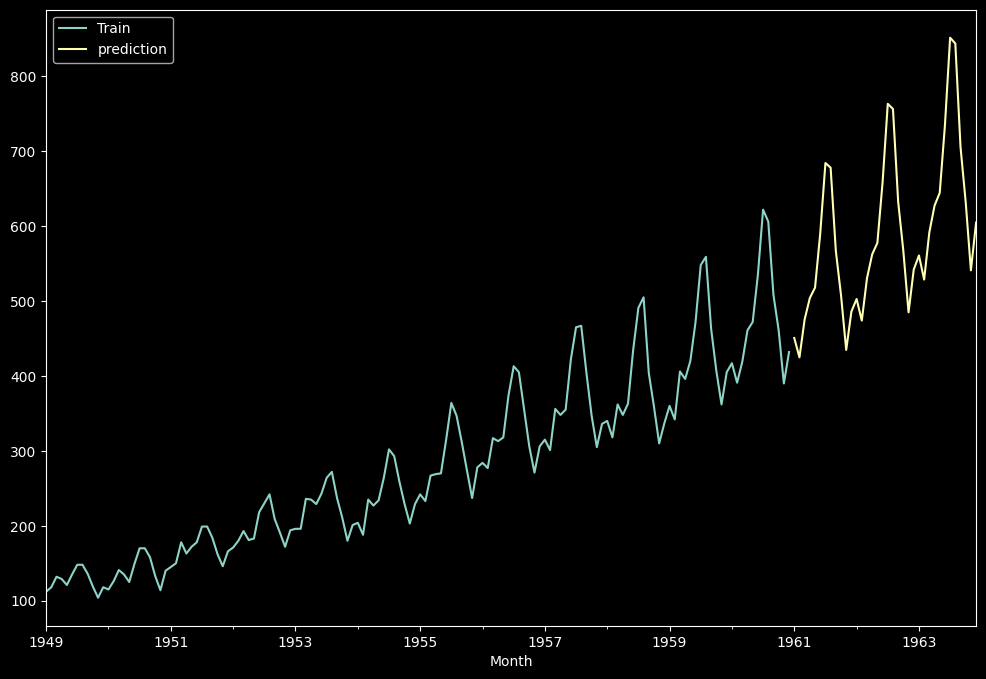

In [92]:
airline['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
forecast_pred.plot(legend=True, label='prediction', figsize=(12,8))

#### Stationarity : time series are stationary if they dont have seasonality or trends. fluctuation in data is based on outside forces
#### Differencing :

In [98]:
sample = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/samples.csv', parse_dates=True, index_col=0)

In [99]:
sample.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


Stationary data

<Axes: >

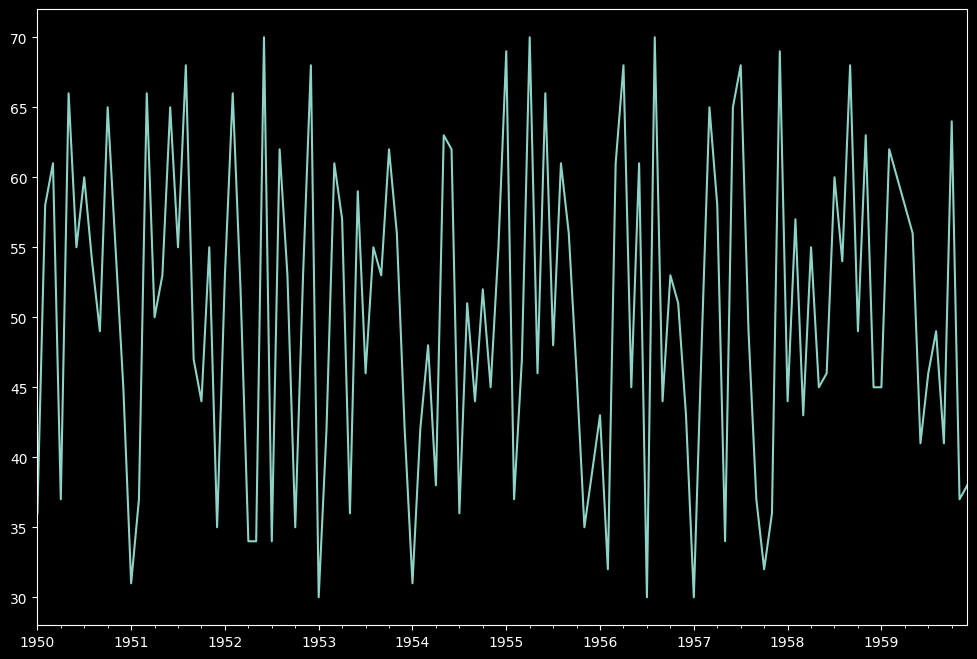

In [100]:
sample['a'].plot(figsize=(12,8))

non stationary data

<Axes: >

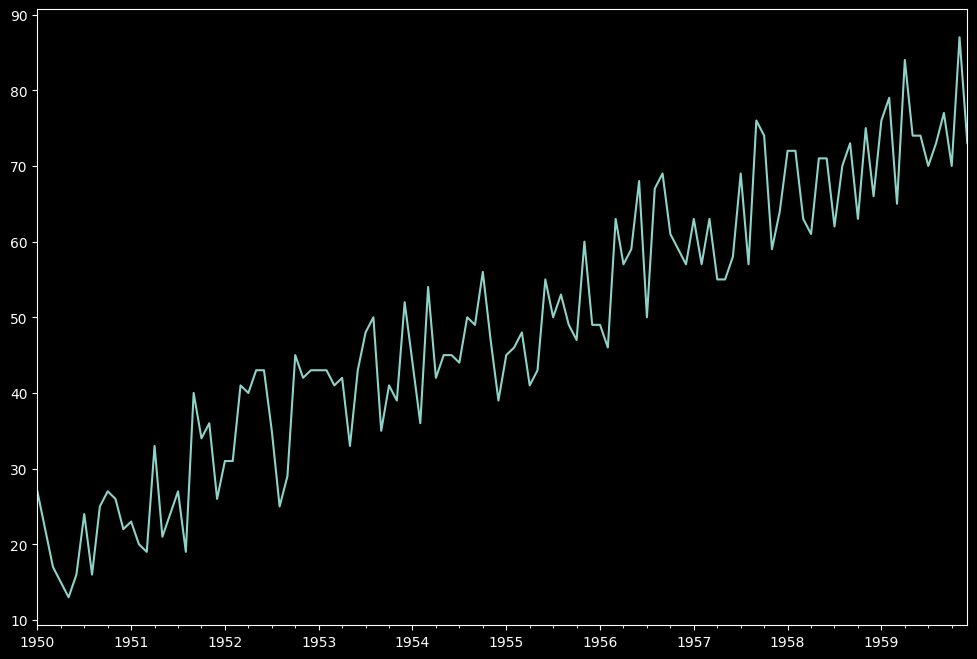

In [101]:
sample['b'].plot(figsize=(12,8))

In [102]:
from statsmodels.tsa.statespace.tools import diff

In [103]:
#the first order difference
sample['b'] - sample['b'].shift()

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

<Axes: >

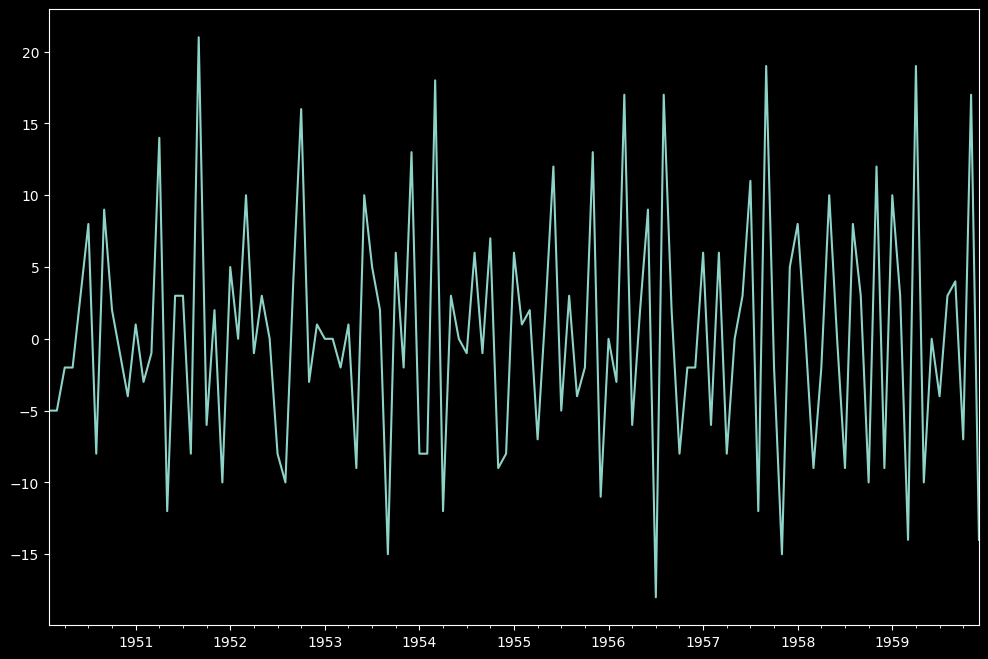

In [105]:
diff(sample['b'], k_diff=1).plot(figsize=(12,8))

#### AutoCorrelation Function Plot (ACF): correlation of the series with itself, lagged by certain number of time units. how correlated are today's sales with yesterday's sales.
Common patterns: Gradual decline / sharp drop offs
#### Partial AutoCorrelation Function Plot (PACF): residual; error not explained by linear model. residuals on lagged days and keep repeating them. direct relation between observation and lag.

#### How it relates to ARIMA model?

In [120]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import  acovf, acf, pacf, pacf_yw, pacf_ols

In [125]:
data = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/airline_passengers.csv', index_col='Month', parse_dates=True)

In [111]:
data2 = pd.read_csv('/home/roserahimi/PycharmProjects/Sproj/TimeSerieAnalysis/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
data2.index.freq='D'

In [113]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [114]:
data2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [115]:
data_f = pd.DataFrame({'a': [13, 5,11,12,9]})

In [116]:
acf(data_f['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [118]:
pacf_yw(data_f['a'], nlags=4, method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [122]:
pacf_ols(data_f['a'], nlags=2)

array([ 1.        , -0.49677419, -0.43181818])

In [127]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

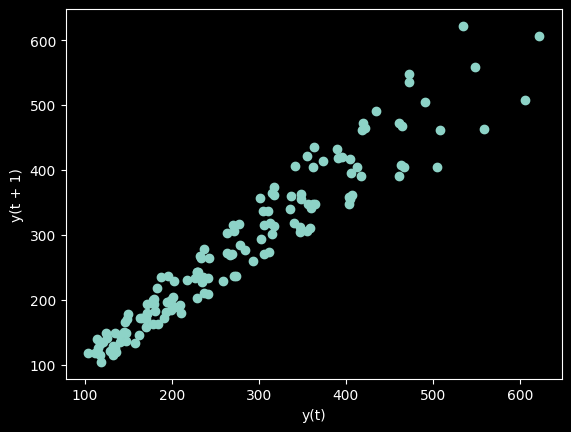

In [129]:
lag_plot(data['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

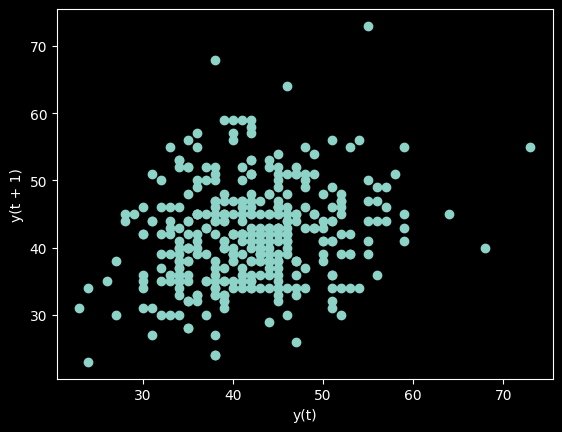

In [130]:
lag_plot(data2['Births'])

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Month'>

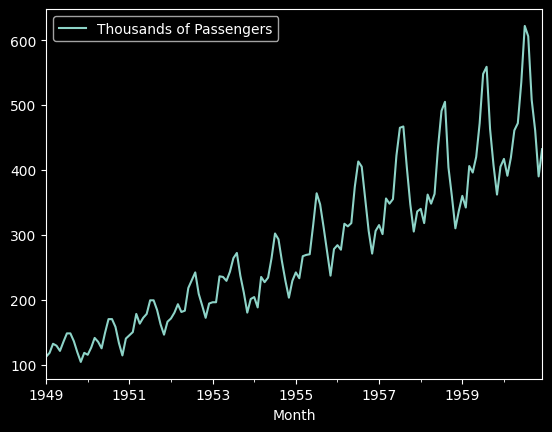

In [132]:
data.plot()

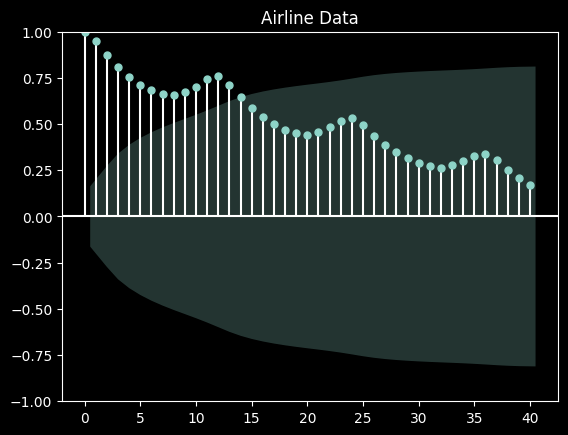

In [142]:
plot_acf(data, lags=40, title='Airline Data');

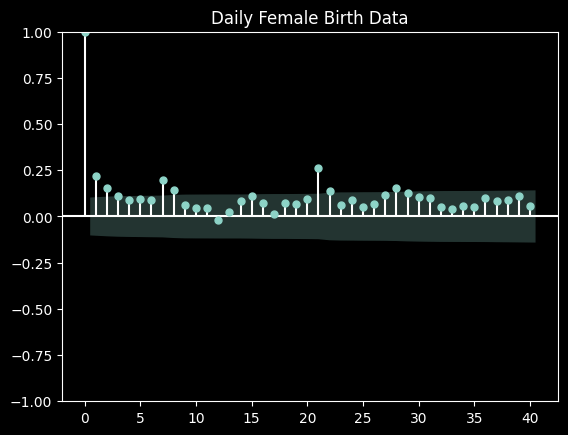

In [143]:
plot_acf(data2, lags=40, title='Daily Female Birth Data');

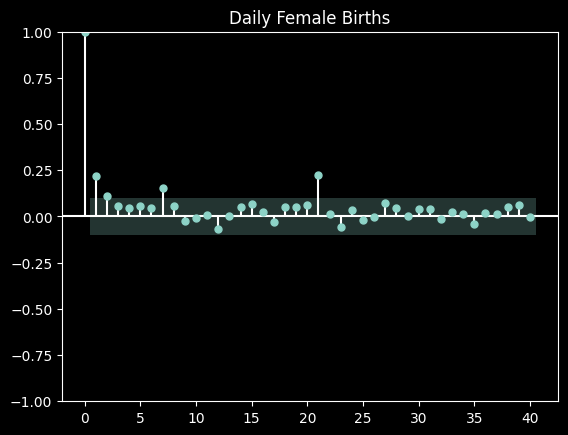

In [140]:
plot_pacf(data2, lags=40, title='Daily Female Births');

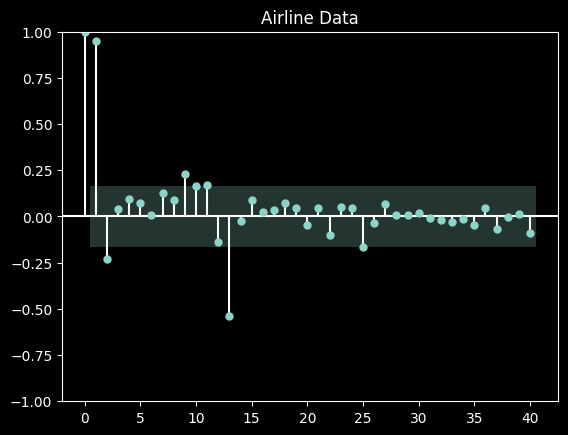

In [141]:
plot_pacf(data, lags=40, title='Airline Data');